# Geothermal gradient map
#### - Cinar

Remove the stanford gradient ones and only combine the dataframes.

remove summer and winter gradients, change it to expected efficienct or something like that

estimate gradeints using linear regression check linear plots

In [1]:
import pandas as pd
import os
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as cx
import seaborn as sns
import warnings
import numpy as np
warnings.filterwarnings('ignore')

In [2]:
data_beg = pd.read_csv('./data/SMU_Borehole_Temp_Obs_in_Content_Model_Format_0.csv')
data_standford = pd.read_csv('./data/Raw_BHT_aggregated_data.csv')

In [3]:
# checking undefined wells' coordinates to see if they land in the area of our interest.
unknown = data_beg[data_beg['State']!='Texas'] 

lat_mask = (unknown['LatDegree'] > 29.6) & (unknown['LatDegree'] < 31.1)
long_mask = (unknown['LongDegree'] > -98.5) & (unknown['LongDegree'] < -96.5)

unknown = unknown[lat_mask & long_mask]

print('No unknown wells are in the area of interest.')

No unknown wells are in the area of interest.


In [4]:
tx = data_beg[data_beg['State']=='Texas']

# County Masks
bastr = tx[tx['County']=='Bastrop County']
will = tx[tx['County']=='Williamson County']
trav = tx[tx['County']=='Travis County']
lee = tx[tx['County']=='Lee County']
bell = tx[tx['County']=='Bell County']
cald = tx[tx['County']=='Caldwell County']
hays = tx[tx['County']=='Hays County']
burn = tx[tx['County']=='Burnet County']
blan = tx[tx['County']=='Blanco County']

counties = [bastr, will, trav, lee, bell, cald, hays, burn, blan]

masked = data_beg[data_beg['State']=='Texas'] 

lat_mask = (masked['LatDegree'] > 29.6) & (masked['LatDegree'] < 31.1)
long_mask = (masked['LongDegree'] > -98.5) & (masked['LongDegree'] < -96.5)

masked = masked[lat_mask & long_mask]
masked['Gradient'] = masked['Gradient'].astype(float)

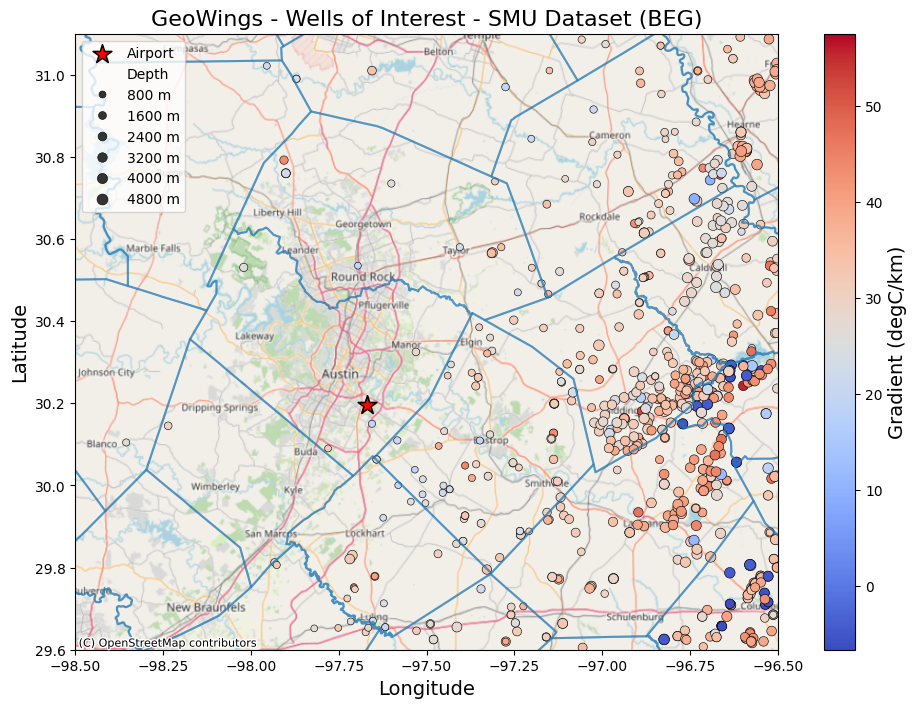

In [5]:
fig, ax = plt.subplots(figsize=(12, 8))
mi_mapa=gpd.read_file('./map/County.shp')
mi_mapa=mi_mapa.to_crs('EPSG:4326')

# https://gis-txdot.opendata.arcgis.com/maps/texas-county-boundaries-detailed
mi_mapa.boundary.plot(ax=ax,alpha =0.5)

source = cx.providers.OpenStreetMap.Mapnik
# source = cx.providers.USGS.USTopo

ax.set_xlim(-98.5,-96.5); ax.set_ylim(29.6,31.1)
cx.add_basemap(ax, crs=mi_mapa.crs.to_string(),source=source,zoom='auto')

# for county in counties:
#     im = sns.scatterplot(x=county['LongDegree'],y=county['LatDegree'], s=30, hue = county['Gradient'],
#                          color='grey', edgecolor='k', ax=ax, palette='coolwarm')

norm = plt.Normalize(vmin=masked['Gradient'].min(), vmax=masked['Gradient'].max()) 
sm = plt.cm.ScalarMappable(cmap='coolwarm', norm=norm)
sm.set_array([])  # Remove the data array requirement for the colorbar

sns.scatterplot(x=masked['LongDegree'],y=masked['LatDegree'], s=30, size=masked['DepthOfMeasurement'], size_norm=(0,6000), hue = masked['Gradient'],
                         color='grey', edgecolor='k', ax=ax, palette='coolwarm', hue_norm=norm)

sns.scatterplot(x=[-97.6704187929783], y=[30.19671731635814], color='red', edgecolor='k', s=200, marker='*', label= 'Airport')

# # sns.scatterplot(eq_pd['longitude'],eq_pd['latitude'],ax=ax,s=120,
# #                 color='red', marker='*',edgecolor='k',label='Earthquakes',legend='brief',
# #                size=eq_pd['mag'],sizes=(50,300),palette='deep')


handles,labels = ax.get_legend_handles_labels()

if 'DepthOfMeasurement' in labels:
    depth_index = labels.index('DepthOfMeasurement')
    # Keep only items after 'DepthOfMeasurement'
    handles = handles[depth_index:]
    labels = labels[depth_index:]

labels = [f'{label} m' for i,label in enumerate(labels)]
labels[0] = 'Depth'
labels[-1] = 'Airport'

labels.insert(0,labels[-1])
handles.insert(0,handles[-1])

labels.pop(-1)
handles.pop(-1)

# Update the legend
ax.legend(handles=handles, labels=labels) #title="Legend")


# plt.legend(handles=[handles[-1],handles[0]], labels=['Airport', 'Wells'])

plt.xlabel('Longitude', fontsize=14); plt.ylabel('Latitude', fontsize=14)
plt.title('GeoWings - Wells of Interest - SMU Dataset (BEG)', fontsize=16)



cbar = fig.colorbar(sm, ax=ax).set_label(label='Gradient (degC/km)',size=14)

plt.savefig('Wells_of_interest_beg_smu.jpeg',dpi=300)
plt.show()

In [6]:
data_standford
lat_mask = (data_standford['Lat'].astype(float) > 29.6) & (data_standford['Lat'].astype(float) < 31.1)
long_mask = (data_standford['Long'].astype(float) > -98.5) & (data_standford['Long'].astype(float) < -96.5)
data_standford_tx = data_standford[data_standford['state']=='TX']
# data_standford_tx_aasg = data_standford_tx[data_standford['Source']=='SMU']
data_standford_tx_masked = data_standford_tx[lat_mask & long_mask]
# assuming soil is 20 degC
# data_standford_tx_masked['Gradient'] = (data_standford_tx_masked['BHT']-20)/(data_standford_tx_masked['Depth']*0.001)
data_standford_tx_masked

Depth        Lat       Long         BHT state Source  \
7116     348.2000  30.566900 -97.313100   33.300000    TX    SMU   
7261     397.3000  30.566900 -97.313100   34.450000    TX    SMU   
7287     405.2000  29.830300 -97.711600   43.300000    TX    SMU   
7495     468.0000  30.566000 -97.315200   37.800000    TX    SMU   
7728     549.7000  29.823200 -97.716300   48.900000    TX    SMU   
...           ...        ...        ...         ...   ...    ...   
92027   5463.2352  30.174894 -96.533837   62.777778    TX    SMU   
287996  2079.6504  30.792459 -97.905937  110.337488    TX   AASG   
329124  2816.3520  30.261000 -98.405000  135.337750    TX   AASG   
337045  3215.6400  30.261000 -98.405000  149.984247    TX   AASG   
348517  4113.5808  30.261000 -98.405000  197.955558    TX   AASG   

                                             geometry      Northing  \
7116              POINT (-97.3131 30.566899999999993)  3.576630e+06   
7261              POINT (-97.3131 30.566899999999993)  3.576630e+06   
7287    POINT (-97.71159999999999 29.830300000000005)  3.481755e+06   
7495                POINT (-97.31519999999999 30.566)  3.576513e+06   
7728    POINT (-97.71629999999999 29.823200000000003)  3.480844e+06   
...                                               ...           ...   
92027           POINT (-96.533837 30.174893700000002)  3.526051e+06   
287996  POINT (-97.90593699999998 30.792459000000008)  3.605825e+06   
329124                         POINT (-98.405 30.261)  3.537143e+06   
337045                         POINT (-98.405 30.261)  3.537143e+06   
348517                         POINT (-98.405 30.261)  3.537143e+06   

             Easting  
7116   -1.083284e+07  
7261   -1.083284e+07  
7287   -1.087721e+07  
7495   -1.083308e+07  
7728   -1.087773e+07  
...              ...  
92027  -1.074610e+07  
287996 -1.089884e+07  
329124 -1.095439e+07  
337045 -1.095439e+07  
348517 -1.095439e+07  

[747 rows x 9 columns]

In [7]:
# Sort your DataFrames by their respective longitude columns
# data_standford_tx_masked.drop(columns='Gradient', inplace=True)
data_standford_tx_masked['Long'] = data_standford_tx_masked['Long'].astype(float)
data_standford_tx_masked['Lat'] = data_standford_tx_masked['Lat'].astype(float)
masked['LongDegree'] = masked['LongDegree'].astype(float)
masked['LatDegree'] = masked['LatDegree'].astype(float)

df1 = data_standford_tx_masked.sort_values(by='Long')
df2 = masked.sort_values(by='LongDegree')

df2 = df2.rename(columns={'LongDegree': 'Long', 'LatDegree': 'Lat'})

merged = pd.merge(df1, df2, on=['Long', 'Lat'], how='outer', suffixes=('_df1', '_df2'))

# Fill missing 'Depth' values using 'DrillerTotalDepth'
# merged['Depth'] = merged['Depth'].combine_first(merged['DrillerTotalDepth'])
# # Fill missing 'DrillerTotalDepth' values using 'Depth'
# merged['DrillerTotalDepth'] = merged['DrillerTotalDepth'].combine_first(merged['Depth'])

result = merged.sort_values(by='Long')
# print(result.columns)

new = result.copy(deep=True)
new = result[
['Depth', 'Lat', 'Long', 'BHT', 'state', 'Source',
       'welltype', 'Status','CommodityOfInterest',
       'County', 'State', 'SRS', 'DrillerTotalDepth','BitDiameterCollar', 'DiameterUnits',
       'MeasuredTemperature', 'CorrectedTemperature', 'TemperatureUnits',
       'Gradient', 'DepthOfMeasurement', 'MeasurementDateTime',
       'CasingBottomDepthDriller', 'CasingTopDepth', 'CasingPipeDiameter',
       'CasingWeight', 'CasingWeightUnits', 'Viscosity', 'InformationSource']
]



new['Gradient']=new['Gradient'].astype(float)
new['CorrectedTemperature']=new['CorrectedTemperature'].astype(float)
new['DepthOfMeasurement'] =new['DepthOfMeasurement'].astype(float)

# new['Gradient'][(new['Gradient']<0)] = (new['CorrectedTemperature']-20)/(new['DepthOfMeasurement']*0.001)
# new['Gradient'][(new['Gradient'].isna())] = (new['MeasuredTemperature']-20)/(new['DepthOfMeasurement']*0.001)

new

Depth        Lat       Long         BHT state Source  \
0    4113.5808  30.261000 -98.405000  197.955558    TX   AASG   
1    3215.6400  30.261000 -98.405000  149.984247    TX   AASG   
2    2816.3520  30.261000 -98.405000  135.337750    TX   AASG   
3     980.0000  30.104692 -98.354790   46.000000    TX    SMU   
4    1420.7000  30.145200 -98.235300   57.200000    TX    SMU   
..         ...        ...        ...         ...   ...    ...   
963  3334.5120  29.800414 -96.502953  115.555556    TX    SMU   
964  3110.0000  29.800165 -96.502722  119.000000    TX    SMU   
965  4273.0000  31.027947 -96.502697  162.000000    TX    SMU   
966  2542.0000  30.552459 -96.502587   82.000000    TX    SMU   
967  2805.8000  30.236100 -96.502300   86.100000    TX    SMU   

            welltype               Status CommodityOfInterest  \
0                NaN                  NaN                 NaN   
1                NaN                  NaN                 NaN   
2                NaN                  NaN                 NaN   
3                NaN                  NaN                 NaN   
4    Oil or Gas Well  Drilled before 1972     Oil or Gas Well   
..               ...                  ...                 ...   
963              NaN                    N                   G   
964              NaN                  NaN                 NaN   
965              NaN                  NaN                 NaN   
966              NaN                  NaN                 NaN   
967  Oil or Gas Well  Drilled before 1972     Oil or Gas Well   

                County  ...   Gradient DepthOfMeasurement  \
0                  NaN  ...        NaN                NaN   
1                  NaN  ...        NaN                NaN   
2                  NaN  ...        NaN                NaN   
3        Blanco County  ...  26.530612            980.000   
4          Hays County  ...  29.492504           1420.700   
..                 ...  ...        ...                ...   
963    Colorado County  ...  -5.997879           3334.512   
964    Colorado County  ...  37.620579           3110.000   
965   Robertson County  ...  37.678446           4273.000   
966    Burleson County  ...  29.897718           2542.000   
967  Washington County  ...  29.367738           2805.800   

     MeasurementDateTime  CasingBottomDepthDriller CasingTopDepth  \
0                    NaN                       NaN            NaN   
1                    NaN                       NaN            NaN   
2                    NaN                       NaN            NaN   
3             01/08/1955                    2256.0      -999999.0   
4                    NaN                       NaN            NaN   
..                   ...                       ...            ...   
963           01/10/2001                   10937.0         7887.0   
964           01/10/2001                   10937.0      -999999.0   
965                  NaN                   15870.0      -999999.0   
966            1/14/1990                    8340.0      -999999.0   
967                  NaN                       NaN            NaN   

     CasingPipeDiameter  CasingWeight CasingWeightUnits  Viscosity  \
0                   NaN           NaN               NaN        NaN   
1                   NaN           NaN               NaN        NaN   
2                   NaN           NaN               NaN        NaN   
3                  7.00           NaN            lbs/ft        NaN   
4                   NaN           NaN            lbs/ft        NaN   
..                  ...           ...               ...        ...   
963                5.50          17.0            lbs/ft       38.0   
964                5.50           NaN            lbs/ft        NaN   
965                4.50           NaN            lbs/ft        NaN   
966                7.63           NaN            lbs/ft        NaN   
967                 NaN           NaN            lbs/ft        NaN   

      InformationSource  
0                 

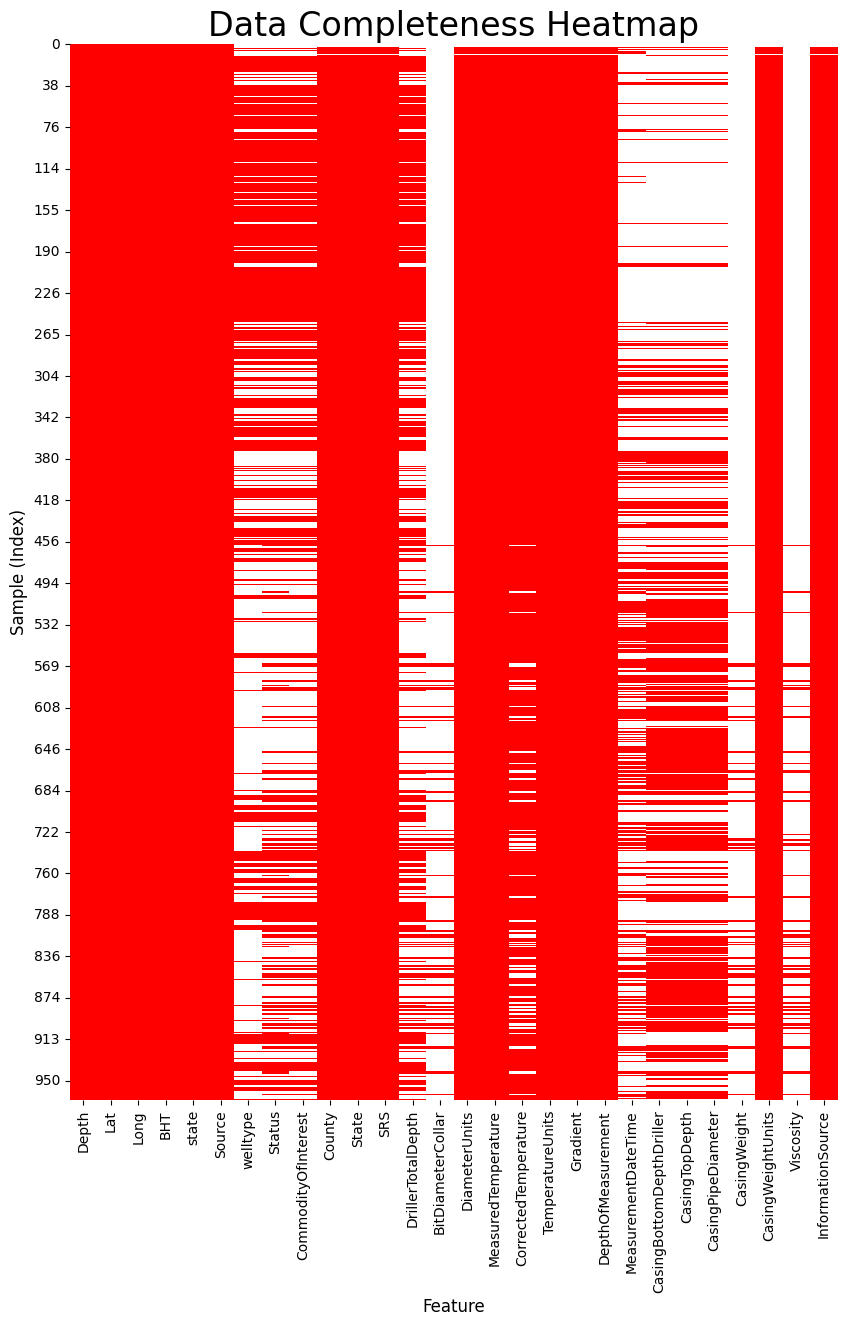

In [47]:
# visualize missing  values:
df_bool = new.isnull()
#df_bool = df_bool.set_index(df_temp.pop('UWI'))        # set the index / feature for the heat map y column
heat = sns.heatmap(df_bool, cmap=['r','w'], annot=False, fmt='.0f',cbar=False,linecolor='black',linewidth=0.0001, xticklabels=True) # make the binary heat map, no bins
heat.set_xticklabels(heat.get_xticklabels(), rotation=90, fontsize=10)
heat.set_yticklabels(heat.get_yticklabels(), rotation=0, fontsize=10)
 
heat.set_title('Data Completeness Heatmap',fontsize=24); heat.set_xlabel('Feature',fontsize=12); heat.set_ylabel('Sample (Index)',fontsize=12)

plt.subplots_adjust(left=0.0, bottom=0.0, right=1.2, top=2.2, wspace=0.2, hspace=0.2) # plot formatting
plt.show()

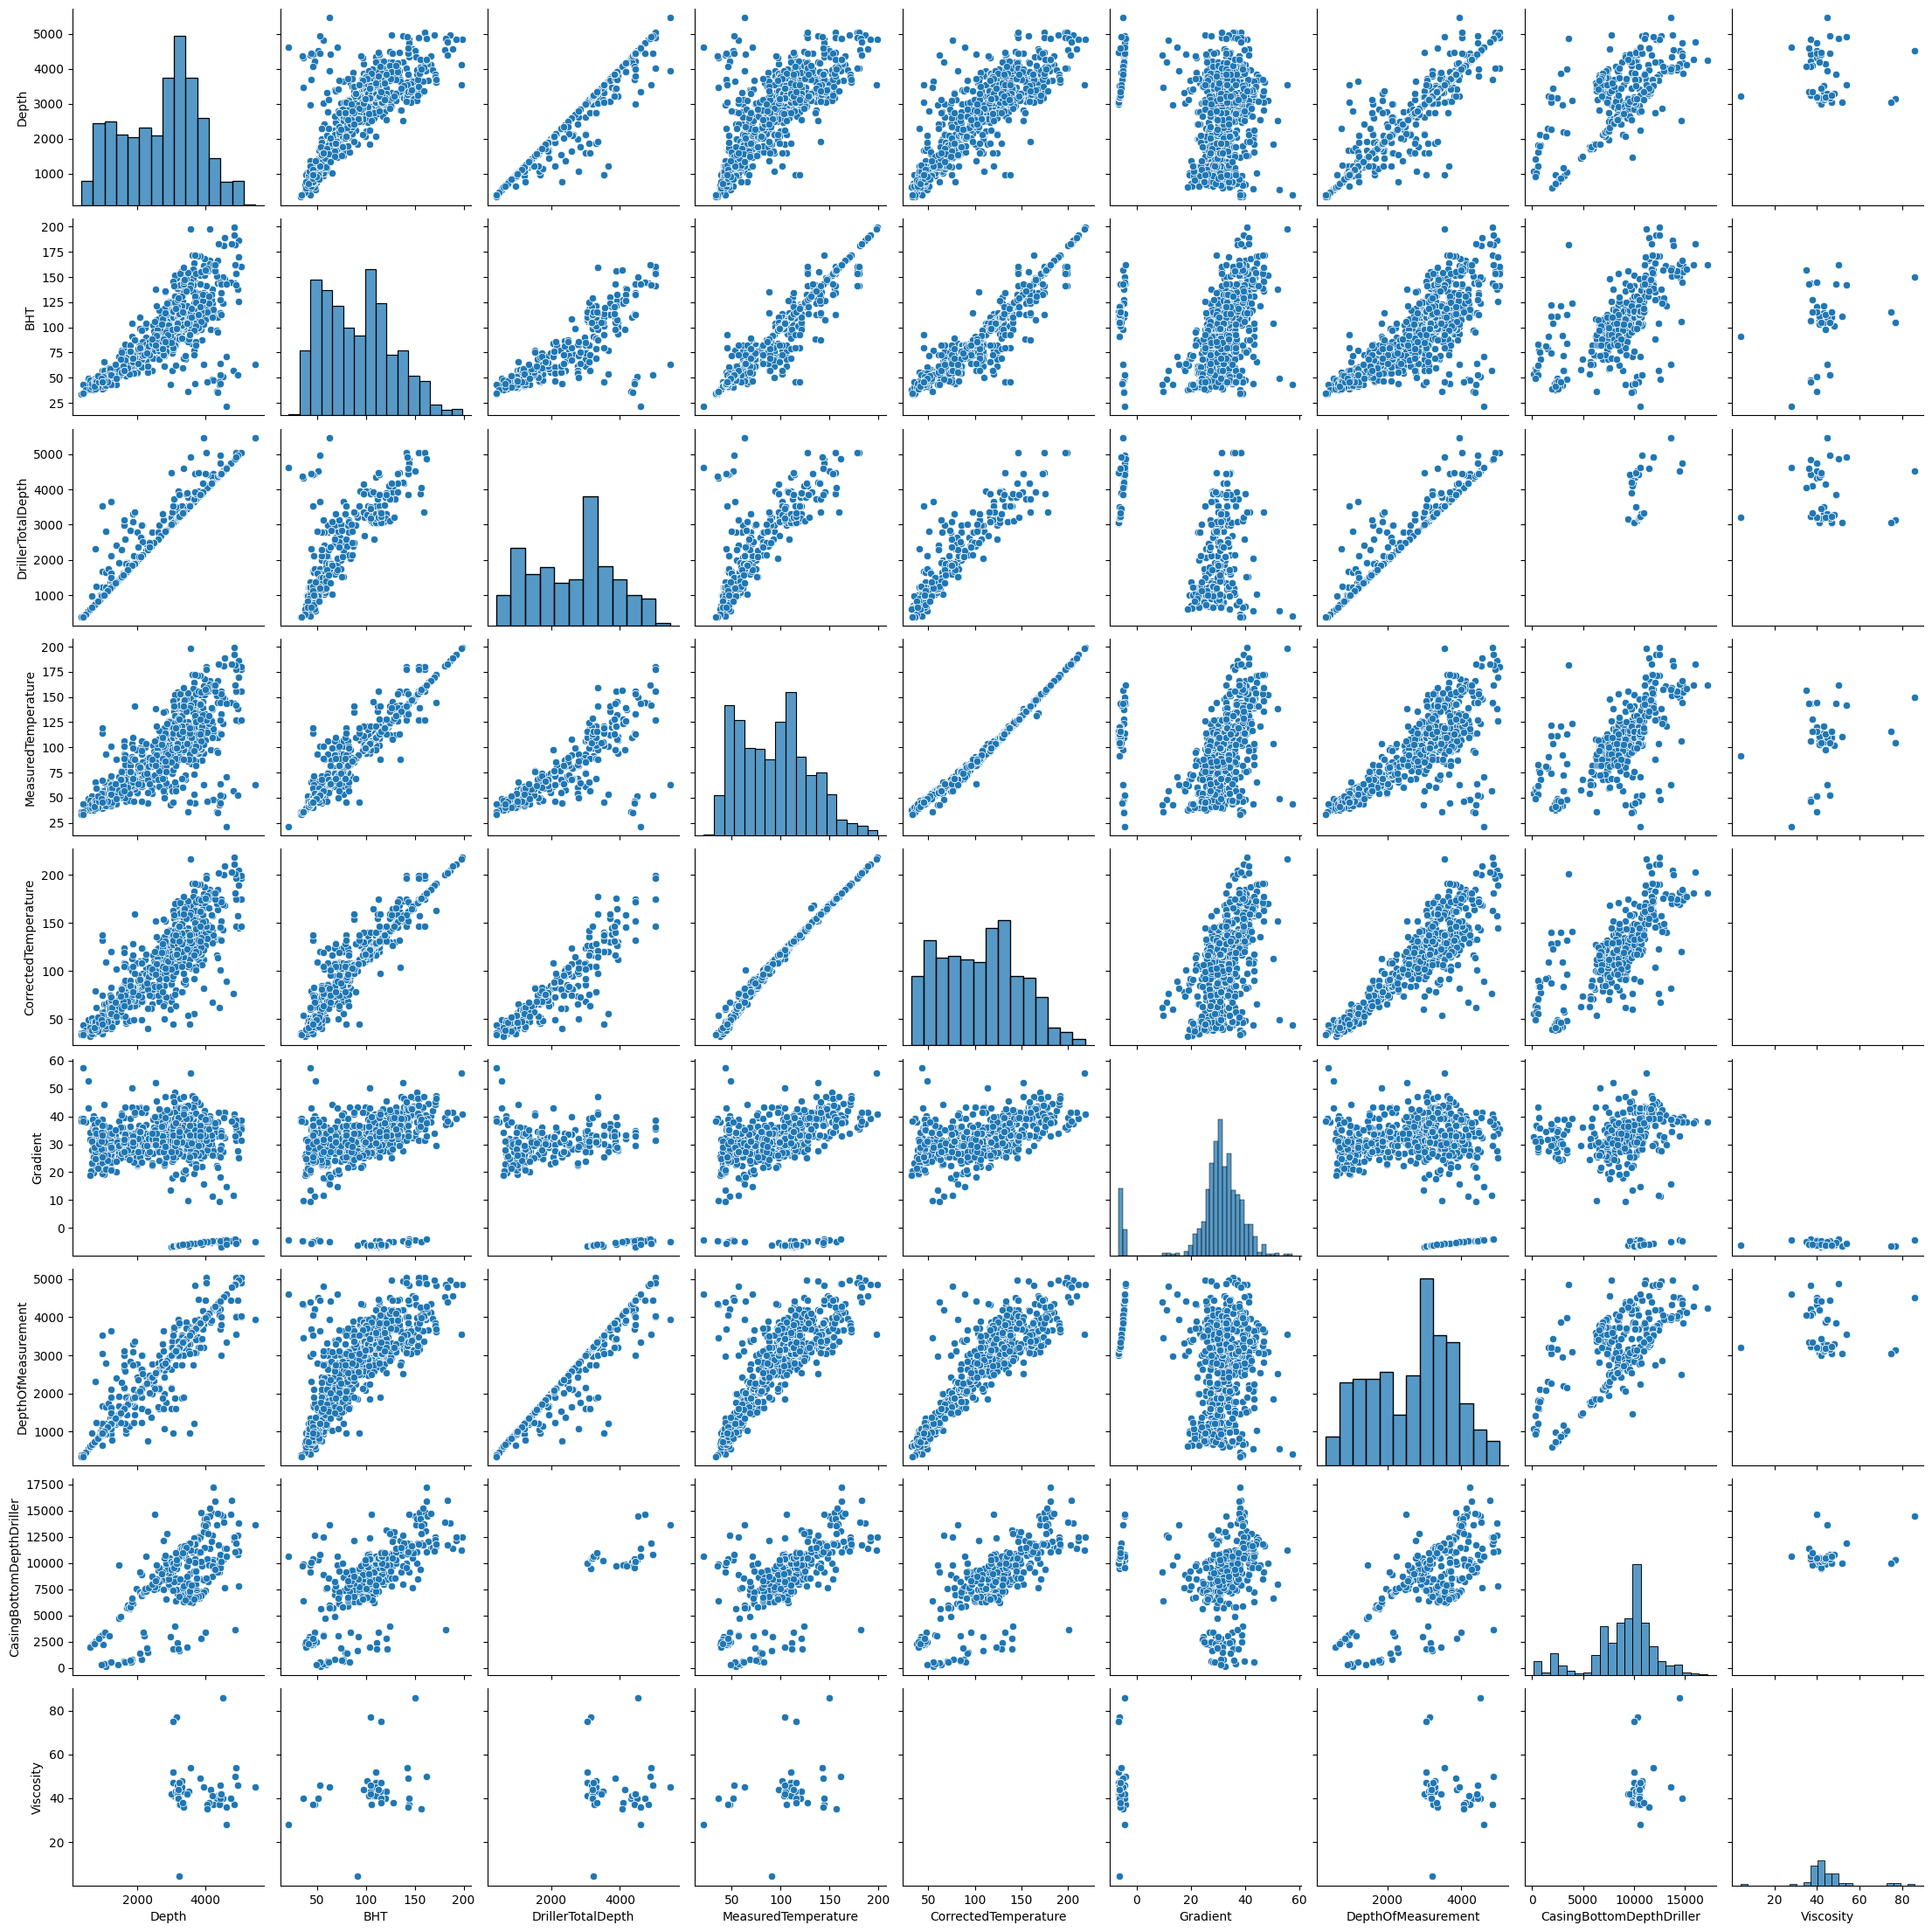

In [9]:
sns.pairplot(new.drop(columns=['Long','Lat','BitDiameterCollar','DiameterUnits','CasingTopDepth','CasingWeight','CasingPipeDiameter']))

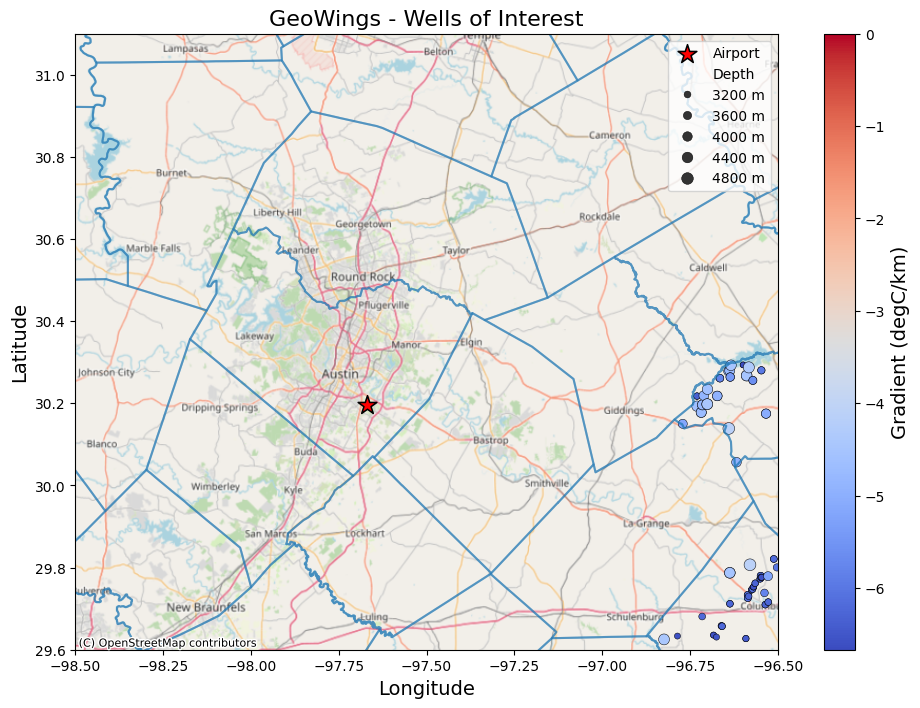

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
mi_mapa=gpd.read_file('./map/County.shp')
mi_mapa=mi_mapa.to_crs('EPSG:4326')

# https://gis-txdot.opendata.arcgis.com/maps/texas-county-boundaries-detailed
mi_mapa.boundary.plot(ax=ax,alpha =0.5)

source = cx.providers.OpenStreetMap.Mapnik
# source = cx.providers.USGS.USTopo

ax.set_xlim(-98.5,-96.5); ax.set_ylim(29.6,31.1)
cx.add_basemap(ax, crs=mi_mapa.crs.to_string(),source=source,zoom='auto')


neg_grad = new[new['Gradient']<0]

# Define the color normalization
norm = plt.Normalize(vmin=neg_grad['Gradient'].astype(float).min(), vmax=0) 
sm = plt.cm.ScalarMappable(cmap='coolwarm', norm=norm)
sm.set_array([])  # Set array to an empty list as data is passed directly


im = sns.scatterplot(x=neg_grad['Long'],y=neg_grad['Lat'], s=30, size= neg_grad['DepthOfMeasurement'], hue = neg_grad['Gradient'],
                        color='grey', edgecolor='k', ax=ax, palette='coolwarm', hue_norm=norm)

sns.scatterplot(x=[-97.6704187929783], y=[30.19671731635814], color='red', edgecolor='k', s=200, marker='*', label= 'Airport')

handles,labels = ax.get_legend_handles_labels()

if 'DepthOfMeasurement' in labels:
    depth_index = labels.index('DepthOfMeasurement')
    # Keep only items after 'DepthOfMeasurement'
    handles = handles[depth_index:]
    labels = labels[depth_index:]

labels = [f'{label} m' for i,label in enumerate(labels)]
labels[0] = 'Depth'
labels[-1] = 'Airport'

labels.insert(0,labels[-1])
handles.insert(0,handles[-1])

labels.pop(-1)
handles.pop(-1)
'Airport'

# Update the legend
ax.legend(handles=handles, labels=labels) #title="Legend")


plt.xlabel('Longitude', fontsize=14); plt.ylabel('Latitude', fontsize=14)
plt.title('GeoWings - Negative Gradient Wells', fontsize=16)


# norm = plt.Normalize(vmin=neg_grad['Gradient'].astype(float).min(), vmax=masked['Gradient'].astype(float).max()) 
# sm = plt.cm.ScalarMappable(cmap='coolwarm', norm=norm)
# sm.set_array(neg_grad['Gradient'].values)  # Remove the data array requirement for the colorbar
cbar = fig.colorbar(sm, ax=ax).set_label(label='Gradient (degC/km)',size=14)


plt.savefig('Wells_of_interest_stan_neg_grad.jpeg',dpi=300)
plt.show()

## ML to predict gradient for various depths at our location

In [11]:
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegressionCV,LogisticRegression,LinearRegression, Ridge
from sklearn.metrics import accuracy_score, classification_report, precision_score, make_scorer, r2_score
from sklearn import tree, mixture, metrics                                                 # tree program from scikit learn (package for machine learning)
from sklearn.tree import _tree,export_graphviz,DecisionTreeClassifier,plot_tree            # for accessing tree information and raphical visualization of trees
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from xgboost import XGBClassifier,XGBRegressor
from sklearn.svm import SVC, SVR
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

In [12]:
new_ml = new.dropna(axis=0, subset=['Lat','Long','Gradient','County','Depth','DepthOfMeasurement','BHT'], how='any')
new_ml = new_ml[['Lat','Long','County','DepthOfMeasurement','Depth','BHT','Gradient']]
# new_ml['County_string'] = new_ml['County']
new_ml['County'] = pd.factorize(new_ml['County'])[0] + 1

print(f'Dataset length before omitting the NA values: {len(new)}')
print(f'Dataset length after omitting the NA values: {len(new_ml)}')
# print(new_ml.head(), '\n')
new_ml = new_ml[new_ml['Gradient']>0]
print(f'Dataset length after omitting the negative gradients: {len(new_ml)}')
print(new_ml.head())

Dataset length before omitting the NA values: 968
Dataset length after omitting the NA values: 964
Dataset length after omitting the negative gradients: 881
         Lat       Long  County  DepthOfMeasurement   Depth   BHT   Gradient
3  30.104692 -98.354790       1               980.0   980.0  46.0  26.530612
4  30.145200 -98.235300       2              1420.7  1420.7  57.2  29.492504
5  30.530964 -98.020188       3              1958.0  1958.0  59.0  25.536261
6  31.021800 -97.954500       4               776.2   776.2  40.6  21.772739
7  29.812806 -97.932798       5              1169.0  1169.0  49.0  26.518392


In [13]:
X_train, X_test, y_train, y_test = train_test_split(new_ml.iloc[:,:4], new_ml.iloc[:,6:7], random_state=17, test_size=0.3)
print(f'Training dataset stats: \n{pd.concat([X_train,y_train],axis=1).describe()}')
print(75*'-')
print(f'Test dataset stats: \n{pd.concat([X_test,y_test],axis=1).describe()}')

scoring_list = [
    'explained_variance',
    'max_error',
    'neg_mean_absolute_error',
    'neg_mean_squared_error',
    'neg_root_mean_squared_error',
    'neg_mean_squared_log_error',
    'neg_root_mean_squared_log_error',
    'neg_median_absolute_error',
    'r2',
    'neg_mean_poisson_deviance',
    'neg_mean_gamma_deviance',
    'neg_mean_absolute_percentage_error',
    'd2_absolute_error_score'
]

# # Set up the pipelines
# svm_pipe = Pipeline([
#     ('scaler', StandardScaler()),
#     ('normalizer', Normalizer()),
#     ('clf', SVC())
# ])

# rf_pipe = Pipeline([
#     ('scaler', StandardScaler()),
#     ('normalizer', Normalizer()),
#     ('clf', RandomForestRegressor())
# ])

xgb_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('normalizer', Normalizer()),
    ('clf', XGBRegressor())
])

# ridge_pipe = Pipeline([
#     ('scaler', StandardScaler()),
#     ('normalizer', Normalizer()),
#     ('clf', Ridge())
# ])

# # Define the grid search parameters
# svm_param_grid = {
#     'clf__kernel': ['linear', 'rbf','poly'],
#     'clf__C': [0.1, 1, 50],
#     'clf__gamma': [1,3,5],
#     'clf__degree': [2,3]
# }
# #'clf__C': 10, 'clf__degree': 4, 'clf__gamma': 1, 'clf__kernel': 'poly'}

# rf_param_grid = {
#     'clf__n_estimators': [100, 200, 300],
#     'clf__max_depth': [50, 100, 200, 300],
#     'clf__min_samples_split': [2, 100]
# }

xgb_param_grid = {
    'clf__max_depth': [None],
    'clf__learning_rate': [0.13],
    'clf__n_estimators': [20],
    'clf__grow_policy' : ['depthwise'],
    'clf__max_bin' : [50]
}

# ridge_param_grid = {
#     'clf__tol': [0.0001, 0.001, 0.1, 1, 10, 100],
#     'clf__alpha': [1, 2, 10, 20, 100],
#     'clf__solver': ['auto', 'sparse_cg', 'svd', 'lsqr']
# }


# # Perform the grid search
# svm_grid = GridSearchCV(svm_pipe, svm_param_grid, cv=5,refit=True, scoring='f1')
# rf_grid = GridSearchCV(rf_pipe, rf_param_grid, cv=5, refit=True, scoring='neg_root_mean_squared_error')
xgb_grid = GridSearchCV(xgb_pipe, xgb_param_grid, cv=5,refit=True, scoring='neg_root_mean_squared_error', verbose = 10)
# ridge_grid = GridSearchCV(ridge_pipe, ridge_param_grid, cv=5,refit=True, scoring='r2')

# svm_grid.fit(X_train.iloc[:,:4], y_train)
# rf_grid.fit(X_train.iloc[:,:4], y_train)
xgb_grid.fit(X_train.iloc[:,:4], y_train)
# ridge_grid.fit(X_train.iloc[:,:4], y_train)



# # Print the best parameters and score for each model
# print("SVM:")
# print("Best parameters: ", svm_grid.best_params_)
# print("Best score: ", round(svm_grid.best_score_,2))
# predictions = svm_grid.predict(X_test.iloc[:,:4])


# print("\nRandom Forest:")
# print("Best parameters: ", rf_grid.best_params_)
# print("Best score: ", round(rf_grid.best_score_,2))
# predictions = rf_grid.predict(X_test.iloc[:,:4])
# print(predictions)

# print("\nXGBoost:")
# print("Best parameters: ", xgb_grid.best_params_)
# print("Best score: ", round(xgb_grid.best_score_,2))
# predictions = xgb_grid.predict(X_test.iloc[:,:4])
# classification_report_str = classification_report(y_test, predictions, target_names=target_names, output_dict=True)
# classification_report_df = pd.DataFrame(classification_report_str).transpose()
# print(round(classification_report_df,2))

# print("\nRidge Regression:")
# print("All parameters: ", ridge_grid.parameters)
# print("Best parameters: ", ridge_grid.best_params_)
# print("Best score: ", round(ridge_grid.best_score_,2))

# print("Mean validation for all parameters: ", ridge_grid.mean_validation_score)
# print("Mean validation for all parameters: ", ridge_grid.best_params_)
# print("CV results: ", ridge_grid.cv_results_)
# predictions = ridge_grid.predict(X_test.iloc[:,:4])
# print(predictions)

Training dataset stats: 
              Lat        Long      County  DepthOfMeasurement    Gradient
count  616.000000  616.000000  616.000000          616.000000  616.000000
mean    30.203606  -96.942201   12.706169         2577.081981   32.158021
std      0.379929    0.352924    3.945527         1098.578191    6.005780
min     29.605100  -98.354790    1.000000          348.200000    9.547624
25%     29.907700  -97.136600   10.000000         1659.500000   28.213620
50%     30.199200  -96.844521   12.000000         2739.900000   31.500163
75%     30.466680  -96.663005   16.000000         3436.500000   35.501717
max     31.092424  -96.502587   21.000000         5037.200000   57.502468
---------------------------------------------------------------------------
Test dataset stats: 
              Lat        Long      County  DepthOfMeasurement    Gradient
count  265.000000  265.000000  265.000000          265.000000  265.000000
mean    30.216539  -96.911369   12.935849         2672.910943   

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('normalizer', Normalizer()),
                                       ('clf',
                                        XGBRegressor(base_score=None,
                                                     booster=None,
                                                     callbacks=None,
                                                     colsample_bylevel=None,
                                                     colsample_bynode=None,
                                                     colsample_bytree=None,
                                                     device=None,
                                                     early_stopping_rounds=None,
                                                     enable_categorical=False,
                                                     eval_metric=None,
                                                     feature_types=None,
                                                     gamma=None,
                                                     grow_pol...
                                                     min_child_weight=None,
                                                     missing=nan,
                                                     monotone_constraints=None,
                                                     multi_strategy=None,
                                                     n_estimators=None,
                                                     n_jobs=None,
                                                     num_parallel_tree=None,
                                                     random_state=None, ...))]),
             param_grid={'clf__grow_policy': ['depthwise'],
                         'clf__learning_rate': [0.13], 'clf__max_bin': [50],
                         'clf__max_depth': [None], 'clf__n_estimators': [20]},
             scoring='neg_root_mean_squared_error', verbose=10)

mean_fit_time
std_fit_time
mean_score_time
std_score_time
param_clf__grow_policy
param_clf__learning_rate
param_clf__max_bin
param_clf__max_depth
param_clf__n_estimators
params
split0_test_score
split1_test_score
split2_test_score
split3_test_score
split4_test_score
mean_test_score
std_test_score
rank_test_score
{'clf__grow_policy': 'depthwise', 'clf__learning_rate': 0.13, 'clf__max_bin': 50, 'clf__max_depth': None, 'clf__n_estimators': 20}
-5.221418803521125
R2:  0.35290902853012085


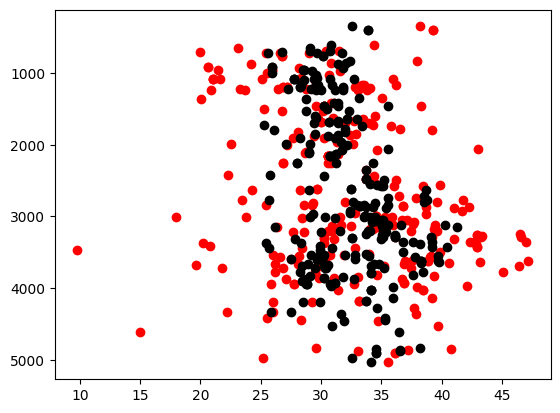

In [14]:
grid = xgb_grid
for key in grid.cv_results_.keys():
    print(key)

# print(grid.cv_results_['mean_test_score'])
print(grid.best_params_)
print(grid.best_score_)
print('R2: ', r2_score(y_pred = grid.predict(X_test), y_true = y_test))
plt.scatter(y_test['Gradient'], X_test['DepthOfMeasurement'], label='Test',c='r')
plt.scatter(grid.predict(X_test), X_test['DepthOfMeasurement'], label='Model Prediction',c='k')
plt.gca().invert_yaxis()

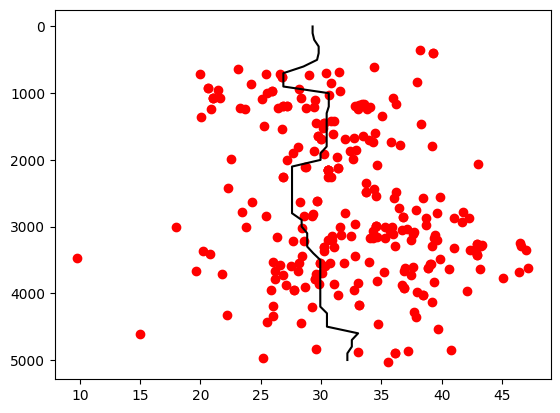

In [17]:
our_well_depth_list = np.arange(0, 5000.1, 100)
our_well_lon = -97.6704187929783
our_well_lat = 30.19671731635814
our_well_county = 5

our_well_preds = pd.DataFrame(data={'Lat': our_well_lat, 'Long': our_well_lon, 'County': our_well_county, 'DepthOfMeasurement': our_well_depth_list})

preds = grid.predict(our_well_preds)


plt.scatter(y_test['Gradient'], X_test['DepthOfMeasurement'], label='Test',c='r')

plt.plot(preds, our_well_depth_list, label='Our Well Model Prediction',c='k')

plt.gca().invert_yaxis()

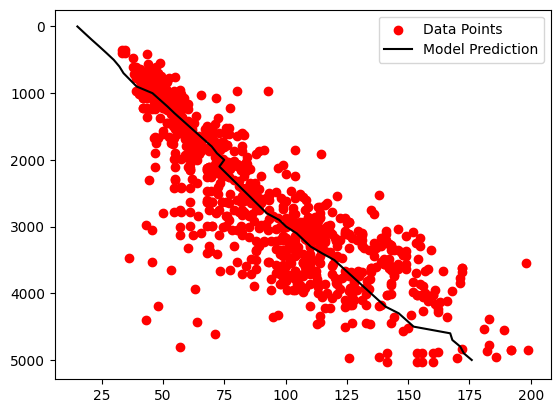

In [23]:

plt.scatter(new_ml['BHT'], new_ml['DepthOfMeasurement'], label='Data Points',c='r')

our_well_preds['BHT'] = 15+preds*our_well_preds['DepthOfMeasurement']/1000 # adding surface T
plt.plot(our_well_preds['BHT'], our_well_preds['DepthOfMeasurement'], label='Model Prediction',c='k')
plt.legend()
plt.gca().invert_yaxis()

# GSHP Modeling

In [34]:
import ghedesigner.manager as ghe_manager

In [44]:
from ghedesigner import *
ghe = ghe_manager.GHEManager()
ghe.set_single_u_tube_pipe(
    inner_diameter=0.03404,
    outer_diameter=0.04216,
    shank_spacing=0.01856,
    roughness=1.0e-6,
    conductivity=0.4,
    rho_cp=1542000.0,
)

# def get_atlanta_loads():
#     # Read the CSV file and convert the loads to a list of length 8760
#     glhe_json_data = 'Atlanta_Office_Building_Loads.csv'
    
#     # Ensure the file is opened and read correctly
#     with open(glhe_json_data, 'r') as file:
#         raw_lines = file.readlines()
    
#     # Convert the lines to a list of float values, skipping the header and empty lines
#     return [float(x.strip()) for x in raw_lines[1:] if x.strip()]

ghe.set_soil(conductivity=2.0, rho_cp=2343493.0, undisturbed_temp=18.3)
ghe.set_grout(conductivity=1.0, rho_cp=3901000.0)
ghe.set_fluid()
ghe.set_borehole(height=96.0, buried_depth=2.0, diameter=0.140)
ghe.set_simulation_parameters(num_months=240, max_eft=35, min_eft=5, max_height=135, min_height=60)
ghe.set_ground_loads_from_hourly_list(get_atlanta_loads())
ghe.set_geometry_constraints_rectangle(length=85.0, width=36.5, b_min=3.0, b_max=10.0)
ghe.set_design(flow_rate=0.5, flow_type_str="borehole")
design = ghe.find_design()


In [46]:
design

0

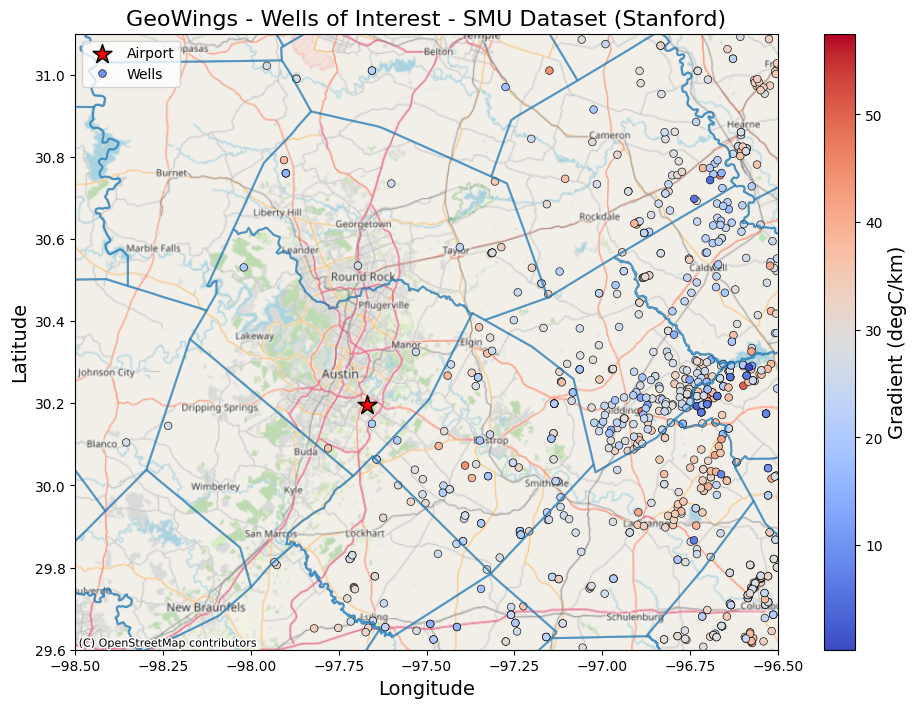

In [ ]:
# fig, ax = plt.subplots(figsize=(12, 8))
# mi_mapa=gpd.read_file('./map/County.shp')
# mi_mapa=mi_mapa.to_crs('EPSG:4326')

# # https://gis-txdot.opendata.arcgis.com/maps/texas-county-boundaries-detailed
# mi_mapa.boundary.plot(ax=ax,alpha =0.5)

# source = cx.providers.OpenStreetMap.Mapnik
# # source = cx.providers.USGS.USTopo

# ax.set_xlim(-98.5,-96.5); ax.set_ylim(29.6,31.1)
# cx.add_basemap(ax, crs=mi_mapa.crs.to_string(),source=source,zoom='auto')


# im = sns.scatterplot(x=data_standford_tx_aasg['Long'],y=data_standford_tx_aasg['Lat'], s=30, hue = data_standford_tx_aasg['Gradient'],
#                         color='grey', edgecolor='k', ax=ax, palette='coolwarm')

# sns.scatterplot(x=[-97.6704187929783], y=[30.19671731635814], color='red', edgecolor='k', s=200, marker='*', label= 'Airport')

# # # sns.scatterplot(eq_pd['longitude'],eq_pd['latitude'],ax=ax,s=120,
# # #                 color='red', marker='*',edgecolor='k',label='Earthquakes',legend='brief',
# # #                size=eq_pd['mag'],sizes=(50,300),palette='deep')


# handles,labels = ax.get_legend_handles_labels()
# plt.legend(handles=[handles[-1],handles[0]], labels=['Airport', 'Wells'])

# plt.xlabel('Longitude', fontsize=14); plt.ylabel('Latitude', fontsize=14)
# plt.title('GeoWings - Wells of Interest - SMU Dataset (Stanford)', fontsize=16)


# norm = plt.Normalize(vmin=data_standford_tx_aasg['Gradient'].astype(float).min(), vmax=data_standford_tx_aasg['Gradient'].astype(float).max()) 
# sm = plt.cm.ScalarMappable(cmap='coolwarm', norm=norm)
# sm.set_array([])  # Remove the data array requirement for the colorbar
# cbar = fig.colorbar(sm, ax=ax).set_label(label='Gradient (degC/km)',size=14)

# plt.savefig('Wells_of_interest_stan_smu.jpeg',dpi=300)
# plt.show()

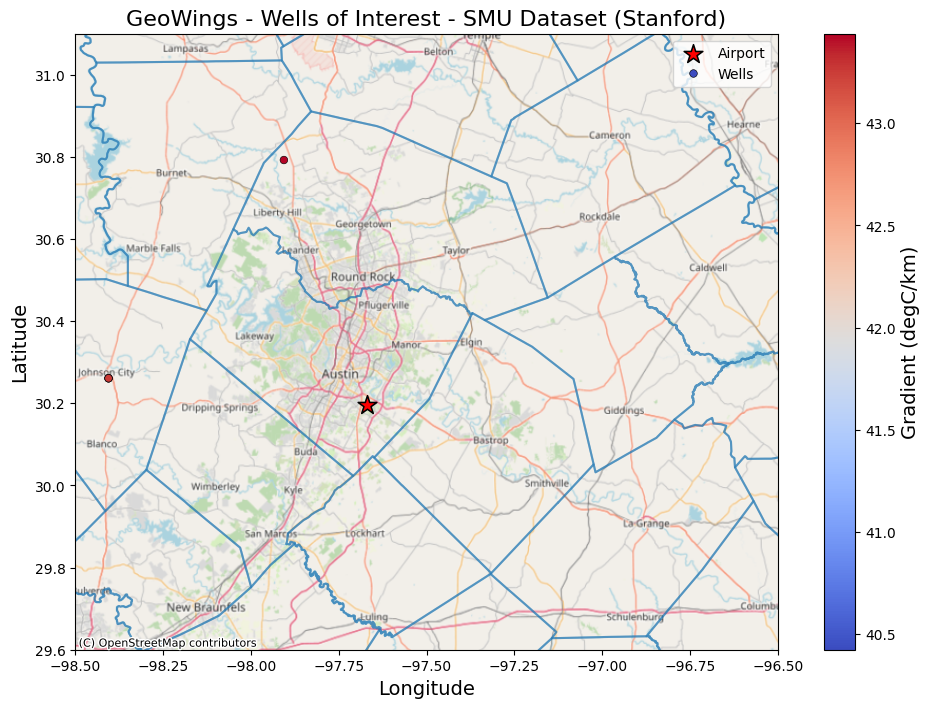

In [247]:
data_standford
lat_mask = (data_standford['Lat'] > 29.6) & (data_standford['Lat'] < 31.1)
long_mask = (data_standford['Long'] > -98.5) & (data_standford['Long'] < -96.5)
data_standford_tx = data_standford[data_standford['state']=='TX']
data_standford_tx_aasg_only = data_standford_tx[data_standford['Source']=='AASG']
data_standford_tx_aasg_only = data_standford_tx_aasg_only[lat_mask & long_mask]
# assuming soil is 20 degC
data_standford_tx_aasg_only['Gradient'] = (data_standford_tx_aasg_only['BHT']-20)/(data_standford_tx_aasg_only['Depth']*0.001)
data_standford_tx_aasg_only

fig, ax = plt.subplots(figsize=(12, 8))
mi_mapa=gpd.read_file('./map/County.shp')
mi_mapa=mi_mapa.to_crs('EPSG:4326')

# https://gis-txdot.opendata.arcgis.com/maps/texas-county-boundaries-detailed
mi_mapa.boundary.plot(ax=ax,alpha =0.5)

source = cx.providers.OpenStreetMap.Mapnik
# source = cx.providers.USGS.USTopo

ax.set_xlim(-98.5,-96.5); ax.set_ylim(29.6,31.1)
cx.add_basemap(ax, crs=mi_mapa.crs.to_string(),source=source,zoom='auto')


im = sns.scatterplot(x=data_standford_tx_aasg_only['Long'],y=data_standford_tx_aasg_only['Lat'], s=30, hue = data_standford_tx_aasg_only['Gradient'],
                        color='grey', edgecolor='k', ax=ax, palette='coolwarm')

sns.scatterplot(x=[-97.6704187929783], y=[30.19671731635814], color='red', edgecolor='k', s=200, marker='*', label= 'Airport')

# # sns.scatterplot(eq_pd['longitude'],eq_pd['latitude'],ax=ax,s=120,
# #                 color='red', marker='*',edgecolor='k',label='Earthquakes',legend='brief',
# #                size=eq_pd['mag'],sizes=(50,300),palette='deep')


handles,labels = ax.get_legend_handles_labels()
plt.legend(handles=[handles[-1],handles[0]], labels=['Airport', 'Wells'])

plt.xlabel('Longitude', fontsize=14); plt.ylabel('Latitude', fontsize=14)
plt.title('GeoWings - Wells of Interest - SMU Dataset (Stanford)', fontsize=16)


norm = plt.Normalize(vmin=data_standford_tx_aasg_only['Gradient'].min(), vmax=data_standford_tx_aasg_only['Gradient'].max()) 
sm = plt.cm.ScalarMappable(cmap='coolwarm', norm=norm)
sm.set_array([])  # Remove the data array requirement for the colorbar
cbar = fig.colorbar(sm, ax=ax).set_label(label='Gradient (degC/km)',size=14)

plt.savefig('Wells_of_interest_stan_aasg.jpeg',dpi=300)
plt.show()

# side by side beg and stan

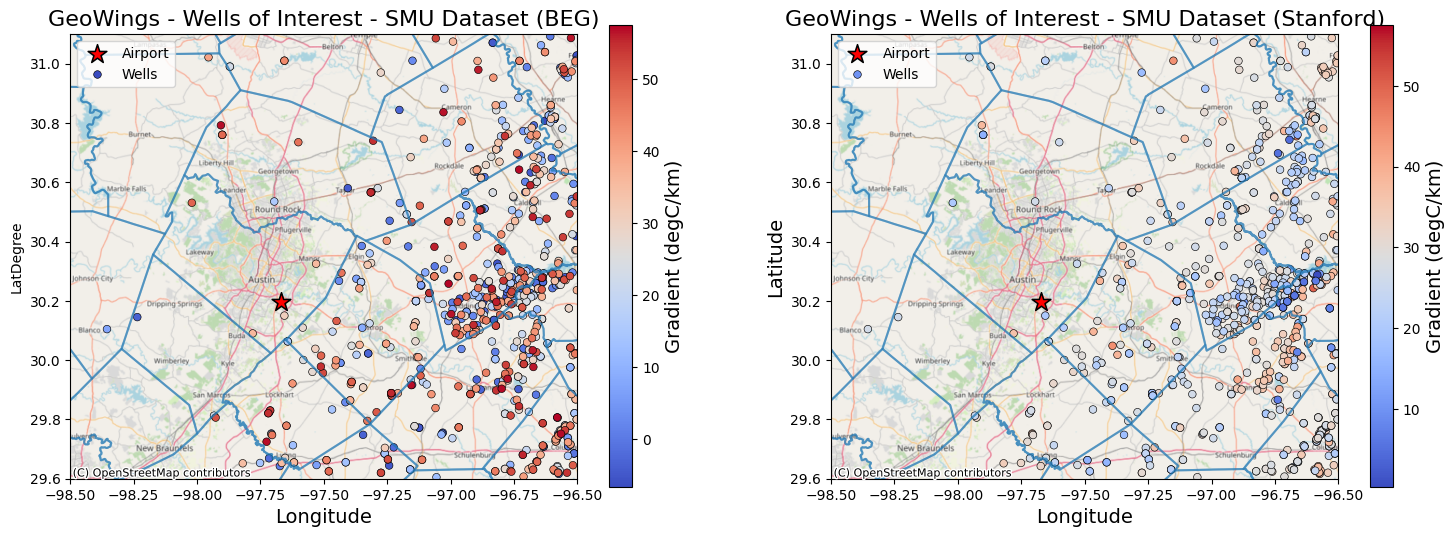

In [258]:
fig, ax = plt.subplots(nrows=1, ncols = 2, figsize=(18, 6))
mi_mapa=gpd.read_file('./map/County.shp')
mi_mapa=mi_mapa.to_crs('EPSG:4326')

# https://gis-txdot.opendata.arcgis.com/maps/texas-county-boundaries-detailed
mi_mapa.boundary.plot(ax=ax[0],alpha =0.5)
mi_mapa.boundary.plot(ax=ax[1],alpha =0.5)
source = cx.providers.OpenStreetMap.Mapnik
# source = cx.providers.USGS.USTopo

ax[0].set_xlim(-98.5,-96.5); ax[0].set_ylim(29.6,31.1)
cx.add_basemap(ax[0], crs=mi_mapa.crs.to_string(),source=source,zoom='auto')

# for county in counties:
#     im = sns.scatterplot(x=county['LongDegree'],y=county['LatDegree'], s=30, hue = county['Gradient'],
#                          color='grey', edgecolor='k', ax=ax[0], palette='coolwarm')

im = sns.scatterplot(x=masked['LongDegree'],y=masked['LatDegree'], s=30, hue = masked['Gradient'],
                         color='grey', edgecolor='k', ax=ax[0], palette='coolwarm')

sns.scatterplot(x=[-97.6704187929783], y=[30.19671731635814], color='red', edgecolor='k', s=200, marker='*', label= 'Airport', ax = ax[0])

# # sns.scatterplot(eq_pd['longitude'],eq_pd['latitude'],ax=ax,s=120,
# #                 color='red', marker='*',edgecolor='k',label='Earthquakes',legend='brief',
# #                size=eq_pd['mag'],sizes=(50,300),palette='deep')


handles,labels = ax[0].get_legend_handles_labels()
ax[0].legend(handles=[handles[-1],handles[0]], labels=['Airport', 'Wells'])

ax[0].set_xlabel('Longitude', fontsize=14); plt.ylabel('Latitude', fontsize=14)
ax[0].set_title('GeoWings - Wells of Interest - SMU Dataset (BEG)', fontsize=16)


norm = plt.Normalize(vmin=masked['Gradient'].astype(float).min(), vmax=masked['Gradient'].astype(float).max()) 
sm = plt.cm.ScalarMappable(cmap='coolwarm', norm=norm)
sm.set_array([])  # Remove the data array requirement for the colorbar
cbar = fig.colorbar(sm, ax=ax[0]).set_label(label='Gradient (degC/km)',size=14)


ax[1].set_xlim(-98.5,-96.5); ax[1].set_ylim(29.6,31.1)
cx.add_basemap(ax[1], crs=mi_mapa.crs.to_string(),source=source,zoom='auto')


im = sns.scatterplot(x=data_standford_tx_aasg['Long'],y=data_standford_tx_aasg['Lat'], s=30, hue = data_standford_tx_aasg['Gradient'],
                        color='grey', edgecolor='k', ax=ax[1], palette='coolwarm')

sns.scatterplot(x=[-97.6704187929783], y=[30.19671731635814], color='red', edgecolor='k', s=200, marker='*', label= 'Airport', ax=ax[1])

# # sns.scatterplot(eq_pd['longitude'],eq_pd['latitude'],ax=ax,s=120,
# #                 color='red', marker='*',edgecolor='k',label='Earthquakes',legend='brief',
# #                size=eq_pd['mag'],sizes=(50,300),palette='deep')


handles,labels = ax[1].get_legend_handles_labels()
ax[1].legend(handles=[handles[-1],handles[0]], labels=['Airport', 'Wells'])

ax[1].set_xlabel('Longitude', fontsize=14); plt.ylabel('Latitude', fontsize=14)
ax[1].set_title('GeoWings - Wells of Interest - SMU Dataset (Stanford)', fontsize=16)


norm = plt.Normalize(vmin=data_standford_tx_aasg['Gradient'].min(), vmax=data_standford_tx_aasg['Gradient'].max()) 
sm = plt.cm.ScalarMappable(cmap='coolwarm', norm=norm)
sm.set_array([])  # Remove the data array requirement for the colorbar
cbar = fig.colorbar(sm, ax=ax[1]).set_label(label='Gradient (degC/km)',size=14)




plt.savefig('Wells_of_interest_comparison.jpeg',dpi=300)
plt.show()

merging two of them

In [ ]:
# Sort your DataFrames by their respective longitude columns
data_standford_tx_aasg.drop(columns='Gradient', inplace=True)
df1 = data_standford_tx_aasg.sort_values(by='Long')
df2 = masked.sort_values(by='LongDegree')

# Rename longitude and latitude columns in df2 for consistency
df2 = df2.rename(columns={'LongDegree': 'Long', 'LatDegree': 'Lat'})

# Perform an outer merge to combine all columns
merged = pd.merge(df1, df2, on=['Long', 'Lat'], how='outer', suffixes=('_df1', '_df2'))

# Fill missing 'Depth' values using 'DrillerTotalDepth'
# merged['Depth'] = merged['Depth'].combine_first(merged['DrillerTotalDepth'])

# # Fill missing 'DrillerTotalDepth' values using 'Depth'
# merged['DrillerTotalDepth'] = merged['DrillerTotalDepth'].combine_first(merged['Depth'])

# Optional: Sort again by 'Long' or another column, if needed
result = merged.sort_values(by='Long')
result.columns

new = result[
['Depth', 'Lat', 'Long', 'BHT', 'Gradient',  'DrillerTotalDepth',
       'TrueVerticalDepth',
       'MeasuredTemperature', 'CorrectedTemperature',
       'DepthOfMeasurement',]   
]



Index(['Depth', 'Lat', 'Long', 'BHT', 'state', 'Source', 'geometry',
       'Northing', 'Easting', 'ObservationURI', 'WellName', 'APINo',
       'HeaderURI', 'OtherID', 'Label', 'Operator', 'LeaseName', 'LeaseOwner',
       'LeaseNo', 'SpudDate', 'EndedDrillingDate', 'welltype', 'Status',
       'CommodityOfInterest', 'StatusDate', 'Field', 'OtherLocationName',
       'County', 'State', 'PLSS_Meridians', 'Township', 'Range', 'Section',
       'SectionPart', 'SRS', 'LocationUncertaintyStatement',
       'DrillerTotalDepth', 'DepthReferencePoint', 'LengthUnits',
       'WellBoreShape', 'TrueVerticalDepth', 'ElevationKB', 'ElevationDF',
       'ElevationGL', 'FormationTD', 'BitDiameterCollar', 'DiameterUnits',
       'MeasuredTemperature', 'CorrectedTemperature', 'TemperatureUnits',
       'Gradient', 'TimeSinceCirculation', 'CorrectionType',
       'DepthOfMeasurement', 'MeasurementDateTime', 'MeasurementSource',
       'CasingBottomDepthDriller', 'CasingTopDepth', 'CasingPipeDiameter',


In [227]:
result[
['Depth', 'Lat', 'Long', 'BHT', 'state', 'Gradient', 'WellName',
       'SpudDate', 'EndedDrillingDate', 'welltype',
       'Status', 'County', 'State', 'DrillerTotalDepth',
       'DepthReferencePoint', 'LengthUnits', 'WellBoreShape',
       'TrueVerticalDepth', 'DiameterUnits',
       'MeasuredTemperature', 'CorrectedTemperature', 'TemperatureUnits',
       'TimeSinceCirculation', 'CorrectionType',
       'DepthOfMeasurement', 'MeasurementDateTime', 'Viscosity', 'InformationSource']   
]

Depth        Lat       Long         BHT state   Gradient  \
0     980.000  30.104692 -98.354790   46.000000    TX  26.530612   
1    1420.700  30.145200 -98.235300   57.200000    TX  29.492504   
2    1958.000  30.530964 -98.020188   59.000000    TX  25.536261   
3     776.200  31.021800 -97.954500   40.600000    TX  21.772739   
4    1169.000  29.812806 -97.932798   49.000000    TX  26.518392   
..        ...        ...        ...         ...   ...        ...   
959  3334.512  29.800414 -96.502953  115.555556    TX  -5.997879   
960  3110.000  29.800165 -96.502722  119.000000    TX  37.620579   
961  4273.000  31.027947 -96.502697  162.000000    TX  37.678446   
962  2542.000  30.552459 -96.502587   82.000000    TX  29.897718   
963  2805.800  30.236100 -96.502300   86.100000    TX  29.367738   

             WellName SpudDate      EndedDrillingDate         welltype  ...  \
0            JSWAGNER      NaN                    NaN              NaN  ...   
1       TX-BHT-003821      NaN                    NaN  Oil or Gas Well  ...   
2         SUNSETRANCH      NaN                    NaN              NaN  ...   
3       TX-BHT-004120      NaN                    NaN  Oil or Gas Well  ...   
4                 NaN      NaN                    NaN              NaN  ...   
..                ...      ...                    ...              ...  ...   
959          4.21E+13      NaN  2001-01-10|2002-01-18              NaN  ...   
960       LEYENDECKER      NaN                    NaN              NaN  ...   
961  BRSTEGALLGASUNIT      NaN                    NaN              NaN  ...   
962          PORTEREB      NaN                    NaN              NaN  ...   
963     TX-BHT-005616      NaN                    NaN  Oil or Gas Well  ...   

    DiameterUnits MeasuredTemperature CorrectedTemperature  TemperatureUnits  \
0          inches           46.000000                 46.0                 C   
1          inches           57.200000                 61.9                 C   
2          inches           59.000000                 70.0                 C   
3          inches           40.600000                 36.9                 C   
4          inches           49.000000                 51.0                 C   
..            ...                 ...                  ...               ...   
959        inches          115.555556                  NaN                 C   
960        inches          119.000000                137.0                 C   
961        inches          162.000000                181.0                 C   
962        inches           82.000000                 96.0                 C   
963        inches           86.100000                102.4                 C   

     TimeSinceCirculation CorrectionType  DepthOfMeasurement  \
0                     NaN            NaN             980.000   
1                     NaN            NaN            1420.700   
2                     NaN            NaN            1958.000   
3                     NaN            NaN             776.200   
4                     NaN            NaN            1169.000   
..                    ...            ...                 ...   
959                 600.0            NaN            3334.512   
960                   NaN            NaN            3110.000   
961                   NaN            NaN            4273.000   
962                   NaN            NaN            2542.000   
963                   NaN            NaN            2805.800   

     MeasurementDateTime Viscosity   InformationSource  
0             01/08/1955       NaN            BEG: BEG  
1                    NaN       NaN             SMU BHT  
2              1/30/1978       NaN            BEG: RRC  
3                    NaN       NaN             SMU BHT  
4              1/18/1982       NaN            BEG: RRC  
..                   ...       ...                 ...  
959           01/10/2001      38.0  MLKay Technologies  
960           01/10/2001       NaN           BEG: IGOR  

In [228]:
new = result[
['Depth', 'Lat', 'Long', 'BHT', 'Gradient',  'DrillerTotalDepth',
       'TrueVerticalDepth',
       'MeasuredTemperature', 'CorrectedTemperature',
       'DepthOfMeasurement',]   
]

In [229]:
mod_new = new[np.abs(new['Gradient'].astype(float) - (new['CorrectedTemperature'].astype(float)-20)/new['DepthOfMeasurement'].astype(float)/0.001)<10]

In [230]:
# the T's are matched, surf temp seems to be 20

In [231]:
new[(new['Gradient'].astype(float)<0)]


Depth        Lat       Long         BHT  Gradient  DrillerTotalDepth  \
455  4515.3072  29.625111 -96.824085  150.000000 -4.429377          4515.3072   
498  3038.8560  29.633267 -96.785907  111.111111 -6.581424          3038.8560   
517  4142.8416  30.150141 -96.770840   97.777778 -5.177276          4142.8416   
564  4329.3792  30.193032 -96.730309   36.111111   -4.6196          4329.3792   
566  3150.4128  30.217627 -96.730302  111.666667 -6.348374          3159.2520   
..         ...        ...        ...         ...       ...                ...   
915  3193.0848  29.715986 -96.527602  112.777778 -6.263535          3200.4000   
916  3200.4000  29.715986 -96.527602  112.777778 -6.263535          3200.4000   
938  3235.4520  29.820994 -96.511654  115.555556 -6.185013          3235.4520   
939  3233.6232  29.820994 -96.511654  115.555556 -6.185013          3235.4520   
959  3334.5120  29.800414 -96.502953  115.555556 -5.997879          3334.5120   

     TrueVerticalDepth  MeasuredTemperature  CorrectedTemperature  \
455                NaN           150.000000                   NaN   
498                NaN           111.111111                   NaN   
517                NaN            97.777778                   NaN   
564                NaN            36.111111                   NaN   
566                NaN           111.666667                   NaN   
..                 ...                  ...                   ...   
915                NaN           112.777778                   NaN   
916                NaN           112.777778                   NaN   
938                NaN           115.555556                   NaN   
939                NaN           115.555556                   NaN   
959                NaN           115.555556                   NaN   

     DepthOfMeasurement  
455           4515.3072  
498           3038.8560  
517           3863.0352  
564           4329.3792  
566           3150.4128  
..                  ...  
915           3193.0848  
916           3193.0848  
938           3233.6232  
939           3233.6232  
959           3334.5120  

[83 rows x 10 columns]

In [232]:
mod_new

Depth        Lat       Long    BHT   Gradient  DrillerTotalDepth  \
0     980.0  30.104692 -98.354790   46.0  26.530612                NaN   
1    1420.7  30.145200 -98.235300   57.2  29.492504             1420.7   
2    1958.0  30.530964 -98.020188   59.0  25.536261                NaN   
3     776.2  31.021800 -97.954500   40.6  21.772739              776.2   
4    1169.0  29.812806 -97.932798   49.0  26.518392                NaN   
..      ...        ...        ...    ...        ...                ...   
958  3996.0  31.012786 -96.503094  157.0  39.039039                NaN   
960  3110.0  29.800165 -96.502722  119.0  37.620579                NaN   
961  4273.0  31.027947 -96.502697  162.0  37.678446                NaN   
962  2542.0  30.552459 -96.502587   82.0  29.897718                NaN   
963  2805.8  30.236100 -96.502300   86.1  29.367738             2805.8   

     TrueVerticalDepth  MeasuredTemperature  CorrectedTemperature  \
0                  NaN                 46.0                  46.0   
1                  NaN                 57.2                  61.9   
2                  NaN                 59.0                  70.0   
3                  NaN                 40.6                  36.9   
4                  NaN                 49.0                  51.0   
..                 ...                  ...                   ...   
958                NaN                157.0                 176.0   
960                NaN                119.0                 137.0   
961                NaN                162.0                 181.0   
962                NaN                 82.0                  96.0   
963                NaN                 86.1                 102.4   

     DepthOfMeasurement  
0                 980.0  
1                1420.7  
2                1958.0  
3                 776.2  
4                1169.0  
..                  ...  
958              3996.0  
960              3110.0  
961              4273.0  
962              2542.0  
963              2805.8  

[881 rows x 10 columns]

In [233]:
#manual correction on 83 negative wells:
# surface temp = 20

In [234]:
new['Gradient']=new['Gradient'].astype(float)
new['CorrectedTemperature']=new['CorrectedTemperature'].astype(float)
new['DepthOfMeasurement'] =new['DepthOfMeasurement'].astype(float)

In [235]:
new[(new['Gradient'].astype(float)<0)]

Depth        Lat       Long         BHT  Gradient  DrillerTotalDepth  \
455  4515.3072  29.625111 -96.824085  150.000000 -4.429377          4515.3072   
498  3038.8560  29.633267 -96.785907  111.111111 -6.581424          3038.8560   
517  4142.8416  30.150141 -96.770840   97.777778 -5.177276          4142.8416   
564  4329.3792  30.193032 -96.730309   36.111111 -4.619600          4329.3792   
566  3150.4128  30.217627 -96.730302  111.666667 -6.348374          3159.2520   
..         ...        ...        ...         ...       ...                ...   
915  3193.0848  29.715986 -96.527602  112.777778 -6.263535          3200.4000   
916  3200.4000  29.715986 -96.527602  112.777778 -6.263535          3200.4000   
938  3235.4520  29.820994 -96.511654  115.555556 -6.185013          3235.4520   
939  3233.6232  29.820994 -96.511654  115.555556 -6.185013          3235.4520   
959  3334.5120  29.800414 -96.502953  115.555556 -5.997879          3334.5120   

     TrueVerticalDepth  MeasuredTemperature  CorrectedTemperature  \
455                NaN           150.000000                   NaN   
498                NaN           111.111111                   NaN   
517                NaN            97.777778                   NaN   
564                NaN            36.111111                   NaN   
566                NaN           111.666667                   NaN   
..                 ...                  ...                   ...   
915                NaN           112.777778                   NaN   
916                NaN           112.777778                   NaN   
938                NaN           115.555556                   NaN   
939                NaN           115.555556                   NaN   
959                NaN           115.555556                   NaN   

     DepthOfMeasurement  
455           4515.3072  
498           3038.8560  
517           3863.0352  
564           4329.3792  
566           3150.4128  
..                  ...  
915           3193.0848  
916           3193.0848  
938           3233.6232  
939           3233.6232  
959           3334.5120  

[83 rows x 10 columns]

In [236]:
new['Gradient'][(new['Gradient']<0)] = (new['CorrectedTemperature']-20)/(new['DepthOfMeasurement']*0.001)
new['Gradient'][(new['Gradient'].isna())] = (new['MeasuredTemperature']-20)/(new['DepthOfMeasurement']*0.001)


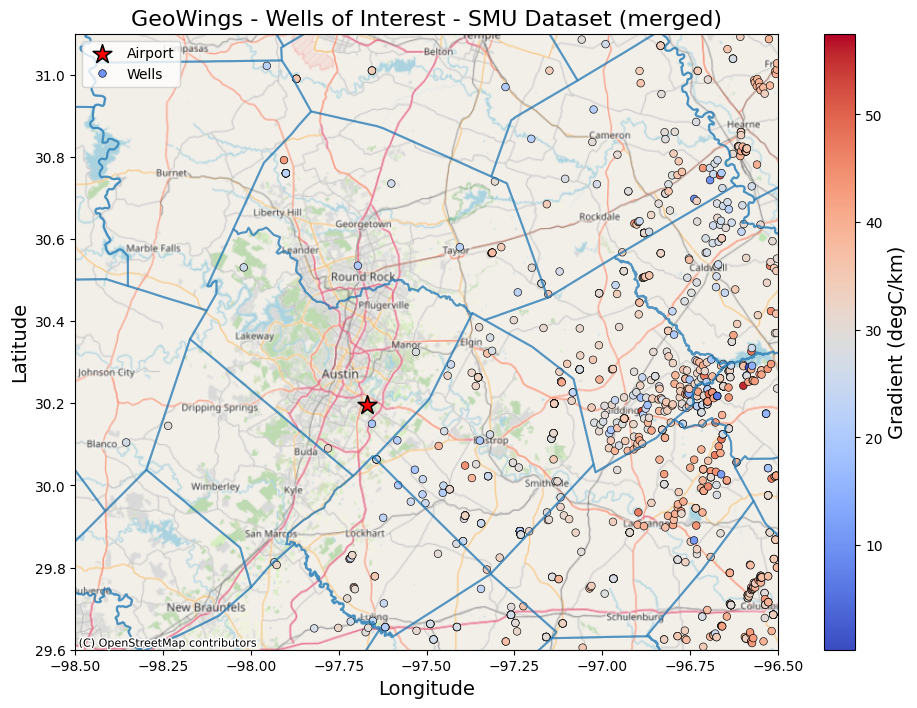

In [239]:
fig, ax = plt.subplots(figsize=(12, 8))
mi_mapa=gpd.read_file('./map/County.shp')
mi_mapa=mi_mapa.to_crs('EPSG:4326')

# https://gis-txdot.opendata.arcgis.com/maps/texas-county-boundaries-detailed
mi_mapa.boundary.plot(ax=ax,alpha =0.5)

source = cx.providers.OpenStreetMap.Mapnik
# source = cx.providers.USGS.USTopo

ax.set_xlim(-98.5,-96.5); ax.set_ylim(29.6,31.1)
cx.add_basemap(ax, crs=mi_mapa.crs.to_string(),source=source,zoom='auto')

# for county in counties:
#     im = sns.scatterplot(x=county['LongDegree'],y=county['LatDegree'], s=30, hue = county['Gradient'],
#                          color='grey', edgecolor='k', ax=ax, palette='coolwarm')

sns.scatterplot(x=new['Long'],y=new['Lat'], s=30, hue = new['Gradient'],
                         color='grey', edgecolor='k', ax=ax, palette='coolwarm')

sns.scatterplot(x=[-97.6704187929783], y=[30.19671731635814], color='red', edgecolor='k', s=200, marker='*', label= 'Airport')

# # sns.scatterplot(eq_pd['longitude'],eq_pd['latitude'],ax=ax,s=120,
# #                 color='red', marker='*',edgecolor='k',label='Earthquakes',legend='brief',
# #                size=eq_pd['mag'],sizes=(50,300),palette='deep')


handles,labels = ax.get_legend_handles_labels()
plt.legend(handles=[handles[-1],handles[0]], labels=['Airport', 'Wells'])

plt.xlabel('Longitude', fontsize=14); plt.ylabel('Latitude', fontsize=14)
plt.title('GeoWings - Wells of Interest - SMU Dataset (merged)', fontsize=16)


norm = plt.Normalize(vmin=new['Gradient'].min(), vmax=new['Gradient'].max()) 
sm = plt.cm.ScalarMappable(cmap='coolwarm', norm=norm)
sm.set_array([])  # Remove the data array requirement for the colorbar
cbar = fig.colorbar(sm, ax=ax).set_label(label='Gradient (degC/km)',size=14)

plt.savefig('Wells_of_interest_merged.jpeg',dpi=300)
plt.show()

In [212]:
# summer and winter:

In [243]:
# Adding SUmmer and winter gradients:
new['s_gradient'] = (new['CorrectedTemperature']-33)/(new['DepthOfMeasurement']*0.001)
new['s_gradient'][(new['s_gradient'].isna())] = (new['MeasuredTemperature']-33)/(new['DepthOfMeasurement']*0.001)

new['w_gradient'] = (new['CorrectedTemperature']-16)/(new['DepthOfMeasurement']*0.001)
new['w_gradient'][(new['w_gradient'].isna())] = (new['MeasuredTemperature']-16)/(new['DepthOfMeasurement']*0.001)

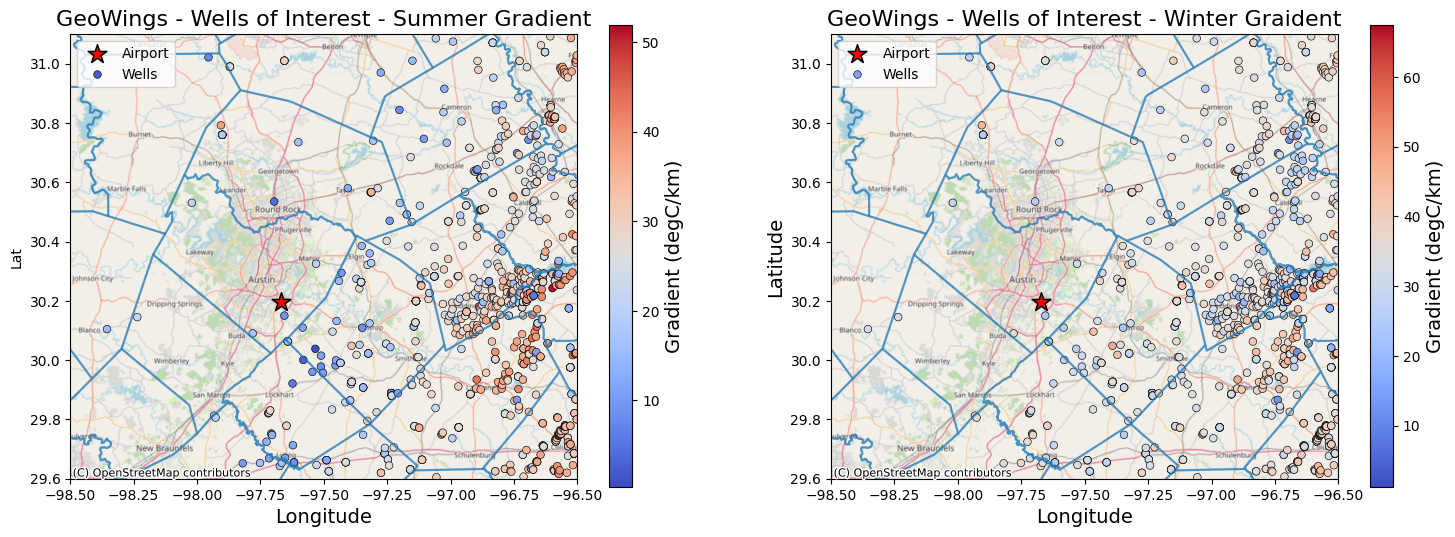

In [266]:
fig, ax = plt.subplots(nrows=1, ncols = 2, figsize=(18, 6))
mi_mapa=gpd.read_file('./map/County.shp')
mi_mapa=mi_mapa.to_crs('EPSG:4326')

# https://gis-txdot.opendata.arcgis.com/maps/texas-county-boundaries-detailed
mi_mapa.boundary.plot(ax=ax[0],alpha =0.5)
mi_mapa.boundary.plot(ax=ax[1],alpha =0.5)
source = cx.providers.OpenStreetMap.Mapnik
# source = cx.providers.USGS.USTopo

ax[0].set_xlim(-98.5,-96.5); ax[0].set_ylim(29.6,31.1)
cx.add_basemap(ax[0], crs=mi_mapa.crs.to_string(),source=source,zoom='auto')

im = sns.scatterplot(x=new['Long'],y=new['Lat'], s=30, hue = new['s_gradient'],
                        color='grey', edgecolor='k', ax=ax[0], palette='coolwarm')

sns.scatterplot(x=[-97.6704187929783], y=[30.19671731635814], color='red', edgecolor='k', s=200, marker='*', label= 'Airport', ax = ax[0])

# # sns.scatterplot(eq_pd['longitude'],eq_pd['latitude'],ax=ax,s=120,
# #                 color='red', marker='*',edgecolor='k',label='Earthquakes',legend='brief',
# #                size=eq_pd['mag'],sizes=(50,300),palette='deep')


handles,labels = ax[0].get_legend_handles_labels()
ax[0].legend(handles=[handles[-1],handles[0]], labels=['Airport', 'Wells'])

ax[0].set_xlabel('Longitude', fontsize=14); plt.ylabel('Latitude', fontsize=14)
ax[0].set_title('GeoWings - Wells of Interest - Summer Gradient', fontsize=16)


norm = plt.Normalize(vmin=new['Gradient'].min(), vmax=new['s_gradient'].max()) 
sm = plt.cm.ScalarMappable(cmap='coolwarm', norm=norm)
sm.set_array([])  # Remove the data array requirement for the colorbar
cbar = fig.colorbar(sm, ax=ax[0]).set_label(label='Gradient (degC/km)',size=14)


ax[1].set_xlim(-98.5,-96.5); ax[1].set_ylim(29.6,31.1)
cx.add_basemap(ax[1], crs=mi_mapa.crs.to_string(),source=source,zoom='auto')


im = sns.scatterplot(x=new['Long'],y=new['Lat'], s=30, hue = new['w_gradient'],
                        color='grey', edgecolor='k', ax=ax[1], palette='coolwarm')

sns.scatterplot(x=[-97.6704187929783], y=[30.19671731635814], color='red', edgecolor='k', s=200, marker='*', label= 'Airport', ax=ax[1])

# # sns.scatterplot(eq_pd['longitude'],eq_pd['latitude'],ax=ax,s=120,
# #                 color='red', marker='*',edgecolor='k',label='Earthquakes',legend='brief',
# #                size=eq_pd['mag'],sizes=(50,300),palette='deep')


handles,labels = ax[1].get_legend_handles_labels()
ax[1].legend(handles=[handles[-1],handles[0]], labels=['Airport', 'Wells'])

ax[1].set_xlabel('Longitude', fontsize=14); plt.ylabel('Latitude', fontsize=14)
ax[1].set_title('GeoWings - Wells of Interest - Winter Graident', fontsize=16)


norm = plt.Normalize(vmin=new['w_gradient'].min(), vmax=new['w_gradient'].max()) 
sm = plt.cm.ScalarMappable(cmap='coolwarm', norm=norm)
sm.set_array([])  # Remove the data array requirement for the colorbar
cbar = fig.colorbar(sm, ax=ax[1]).set_label(label='Gradient (degC/km)',size=14)




plt.savefig('Wells_of_interest_seasonal.jpeg',dpi=300)
plt.show()